# Linear Regression, Correlation, Coefficient of Determination

We are going to apply a model to predict the response of treatment for diabetes using the 'diabetes' dataset in sklearn. We will use Linear Regression for the model to try to fit the best-fit line to the input or feature data and the output response. the output response is a measure of disease progression one year after baseline measurements were taken We will then calculate the regression coefficients, the mean square error, and the coefficient of determination. We will also standardize the data for greater metric accuracy.

In trying to determine the best-fit that describes the relationship of the input features with the output response, we will briefly mention ways of performing this method. However, a more thorough explanation of latest techniques can be found in the original paper. http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf

In [45]:
from sklearn import datasets #https://scikit-learn.org/stable/datasets/toy_dataset.html
from sklearn import preprocessing
import pandas as pd
import seaborn as sns

diabetes_data= datasets.load_diabetes()
df_diabetes = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df_diabetes['response']= pd.Series(diabetes_data.target)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,response
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [48]:
#predictors is a list containing the input features
#Step Wise Regression involves playing with different combinations of predictors to understand the best coeff_determination and MSE


#predictors = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] # 0.56, 3045
predictors = ['bmi', 'bp', 's4', 's5'] # 0.45, 3087

In [49]:
# response is a list containing the response
# response is a measure of disease progression one year after baseline measurements were taken

response = ['response']

In [50]:
x = df_diabetes[predictors] #independant inputs variables
x= preprocessing.scale(x)
y = df_diabetes[response] #dependant outputs

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [53]:
linrgr = LinearRegression()
linrgr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
linrgr.score(x_test,y_test)

0.4543481487817533

In [55]:
# Now lets predict what our model will output for the test data input
y_pred=linrgr.predict(x_test)

# Here are the regression coefficients
print('Regression Coeffs:\n', linrgr.coef_)

# The coefficient of determination is the correlation coefficient squared
# This will give an indication of which features contributed most to explaining the variance in the output response
print('Coefficient of Determination:/n', r2_score(y_test,y_pred))

# This will calculate the Mean Square Error between our model output and the 
# Here we compare our model output predictions to the actual data response output using the selected y test data
print('MSE: /n', mean_squared_error(y_test,y_pred))


Regression Coeffs:
 [[28.96969758 12.56341822  6.65534605 22.25128022]]
Coefficient of Determination:/n 0.45434814878175334
MSE: /n 3087.3747895408314


In [57]:
#output of regression coef_ is a list within a list. Required to flatten out before graphing
from itertools import chain 

feature_importance = linrgr.coef_
feature_importance=list(chain.from_iterable(feature_importance))
print(feature_importance)

[28.96969757718393, 12.563418219994036, 6.6553460472191, 22.251280224141063]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

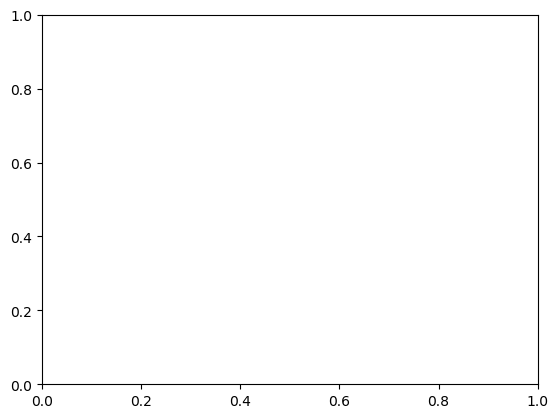

In [58]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

features = ('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6')
#features = ('s2', 's5', )
#features = ('bmi', 'bp', 's4', 's5')
y_pos = np.arange(len(features))

plt.bar(y_pos, feature_importance, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Regression Coefficient')
plt.title('Feature Importance')
plt.show()
print(feature_importance)